In [1]:
import numpy as np
from tqdm import tqdm
from glob import glob
from utils import data as ud
from utils import analysis as ua
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def show_arpes(arpes):
    data = arpes['data']
    ax0 = arpes['ax0']
    ax1 = arpes['ax1']
    
    # TODO Is this a forever-constant?
    ax0 = 16.89 - ax0
    extent = [ax1[0], ax1[-1], ax0[-1], ax0[0]]
    
    plt.imshow(data, extent = extent, aspect = 'auto')

(0, 1)

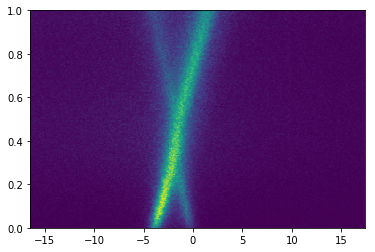

In [3]:
path = 'data/I=55/1225b.txt'
arpes = ud.read_arpes(path)
show_arpes(arpes)
plt.ylim([0, 1])

In [4]:
Ekins = arpes['ax0']
Eb = 16.89 - arpes['ax0']

# Select the range
Eb_min = 0.25
Eb_max = 0.6
ids = (Eb > Eb_min) & (Eb < Eb_max)
ids = np.where(ids)[0]

  3%|▎         | 2/69 [00:00<00:06,  9.92it/s]

[  4.50795223e+01   1.77515907e+02   7.94534217e-02  -4.01393249e-02]


 12%|█▏        | 8/69 [00:00<00:04, 13.24it/s]

[  4.08450904e+01   1.81103231e+02   7.99812745e-02  -4.40009121e-02]
[  4.57699096e+01   1.71943754e+02   7.50343939e-02  -4.55041940e-02]


 25%|██▍       | 17/69 [00:00<00:02, 17.52it/s]

[  5.25577613e+01   1.63012122e+02   6.93952059e-02  -4.95014802e-02]
[  5.67109053e+01   1.53695541e+02   7.13543560e-02  -5.14029552e-02]


 42%|████▏     | 29/69 [00:01<00:01, 22.98it/s]

[  5.15190624e+01   1.58552604e+02   6.75373579e-02  -5.65012396e-02]
[  5.78478555e+01   1.55151062e+02   6.07785797e-02  -5.79114628e-02]


 54%|█████▎    | 37/69 [00:01<00:01, 21.45it/s]

[  5.28629796e+01   1.59391945e+02   6.24812668e-02  -6.07646763e-02]


 61%|██████    | 42/69 [00:01<00:01, 23.08it/s]

[  5.36576399e+01   1.62336602e+02   6.28515141e-02  -6.26831304e-02]
[  4.99217520e+01   1.61174345e+02   5.73073684e-02  -6.78247049e-02]


 75%|███████▌  | 52/69 [00:02<00:00, 24.25it/s]

[  3.79627432e+01   1.69421933e+02   5.81012082e-02  -6.89024135e-02]
[  3.68238990e+01   1.72287780e+02   5.95604738e-02  -7.24068752e-02]


 93%|█████████▎| 64/69 [00:02<00:00, 25.03it/s]

[  2.50598279e+01   1.73441510e+02   6.33134381e-02  -7.35252831e-02]
[  1.89782379e+01   1.83402720e+02   6.50087050e-02  -7.83208816e-02]


100%|██████████| 69/69 [00:02<00:00, 24.38it/s]


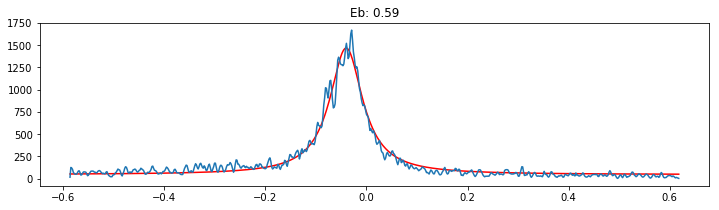

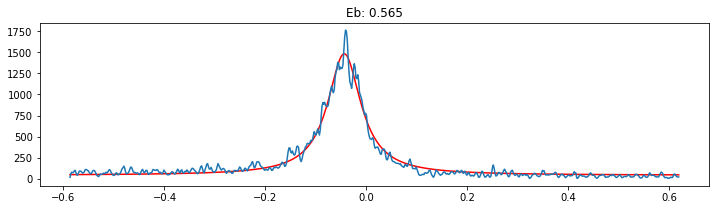

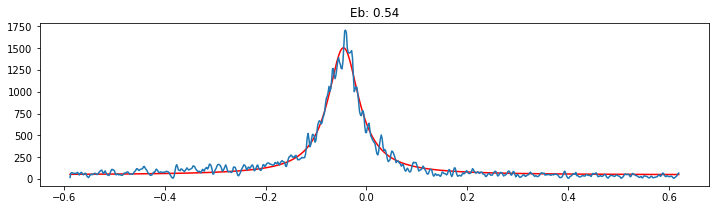

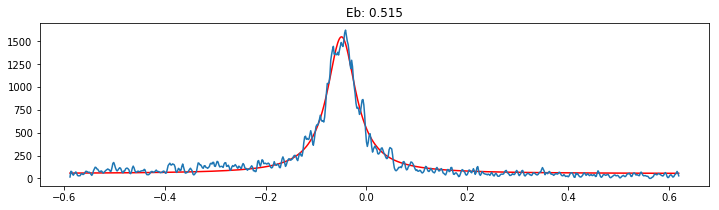

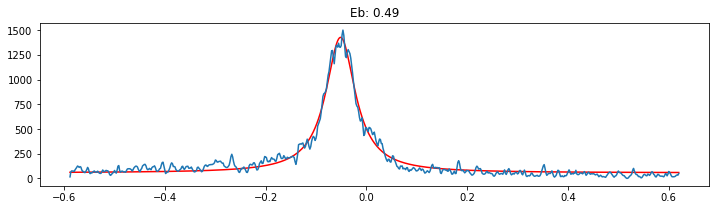

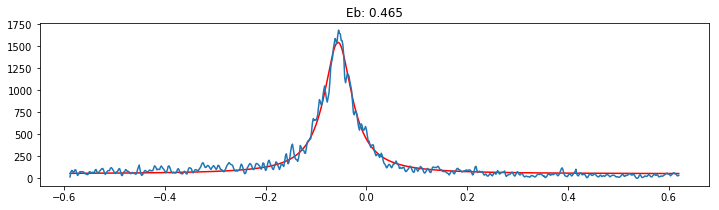

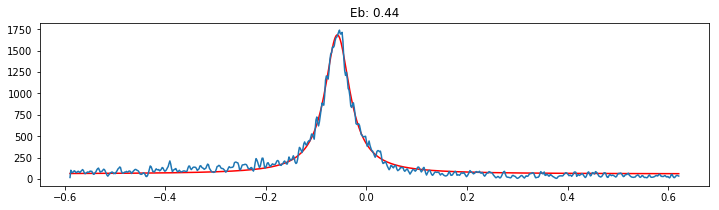

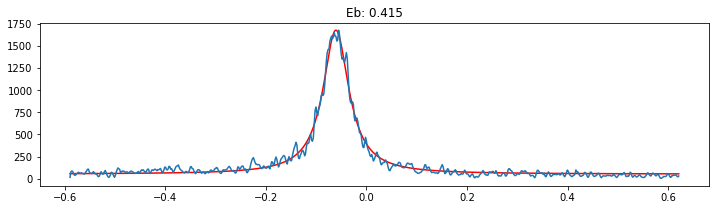

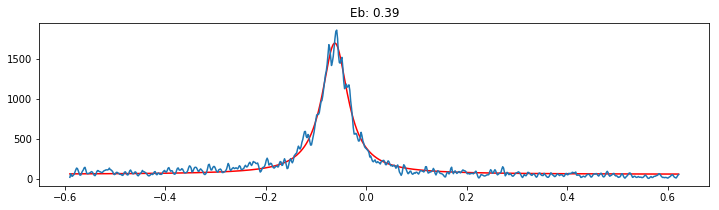

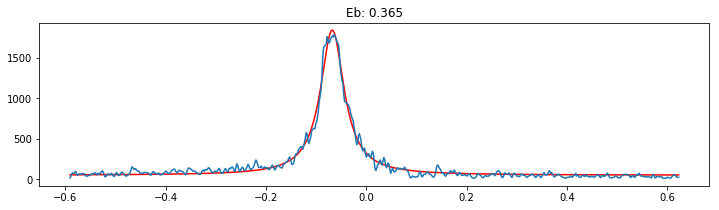

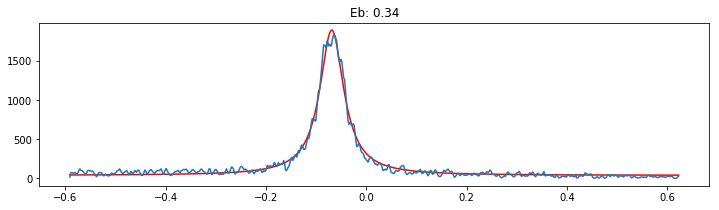

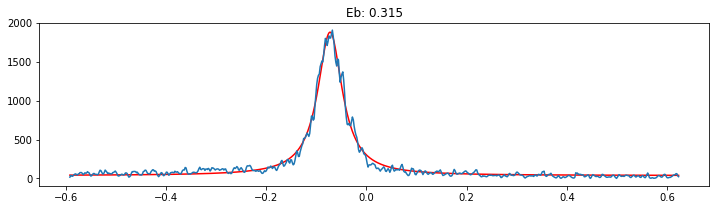

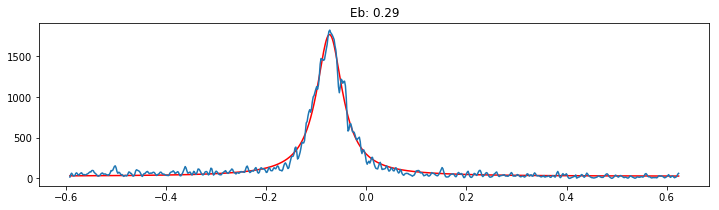

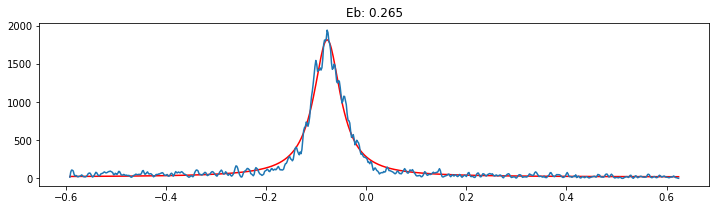

In [5]:
scores = []
costs = []
for it in tqdm(ids):
    k, score = ua.fit_function(arpes, it)
    scores.append(score)
    costs.append(score.cost)
    # if score.cost > 3e7: continue
    if it % 5 == 0:
        print score.x
        plt.figure(figsize = [12, 3])
        plt.title('Eb: {}'.format(Eb[it]))
        plt.plot(k, ua.lorentzian(k, score.x), c='r')
        plt.plot(k, arpes['data'][it][:-1])

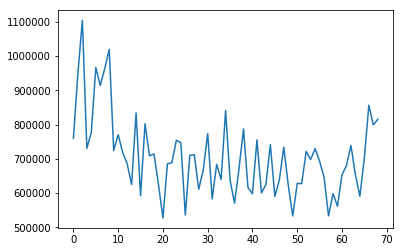

In [6]:
plt.plot(costs)

In [7]:
w1 = []
cost = []
for score in scores:
    w1.append(score.x[2])
    cost.append(score.cost)

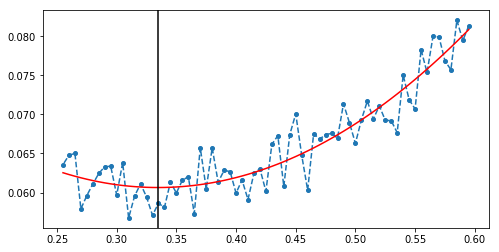

Parabola minimum: 0.334647620811, 0.0606446246703


In [8]:
plt.figure(figsize = [8, 4])
plt.plot(Eb[ids], w1, '--o', ms = 4)

z = np.polyfit(Eb[ids], w1, 2)
p = np.poly1d(z)
plt.plot(Eb[ids], p(Eb[ids]), c='r')

# -b/2a
x_min = -z[1]/(2*z[0])
plt.axvline(x = x_min, c = 'k')
plt.show()

print 'Parabola minimum: {}, {}'.format(x_min, p(x_min))

### See bad fits

In [9]:
w1 = np.array(w1)
bad_ids = np.where(w1 < 0)[0]

In [10]:
for it in bad_ids:
    score = scores[it]
    print score.cost
    plt.plot(k, ua.lorentzian(k, score.x), c='r')
    plt.plot(k, arpes['data'][it][:-1])
    plt.show()

Text(0.5,1,u'residuals')

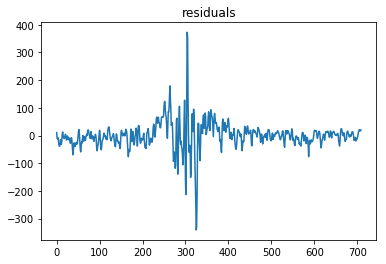

In [11]:
plt.plot(score.fun)
plt.title('residuals')

In [12]:
path

'data/I=55/1225b.txt'

In [13]:
score.x

array([  2.04544550e+01,   1.80091737e+02,   6.35741748e-02,
        -7.94106467e-02])

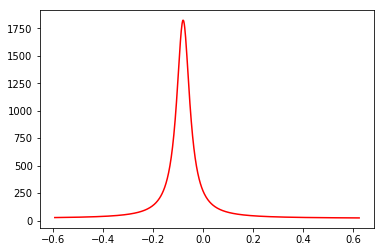

In [14]:
plt.plot(k, ua.lorentzian(k, score.x), c='r')

In [15]:
print score.x[1]

180.091736732
